## *Studi Kasus* :
- Menganalisis faktor - faktor yang membuat pelanggan berheti menggunakan produk atau layanan
- Mengidentifikasi ciri - ciri pelanggan yang akan berhenti menggunakan produk atau layanan.
- Memprediksi pelanggan beresiko berhenti menggunakan produk.
- Memberikan solusi untuk mengurangi jumlah pelanggan yang beresiko.

# A. Import library dan EDA

In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
dfc = df.copy(deep=True)
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
dfc['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

## Menemukan Kejanggalan di data

### Kami menemukan bahwa dataframe mendeteksi **semua kolom sebagai tipe data objek**, Karena **kejanggalan data** ini, kami memutuskan untuk mengecek langsung file csv yang diberikan dan menemukan kejanggalan lain, yaitu:

#### 1. **Beberapa kolom memiliki nilai no internet service sebagai nilai**, meskipun bukan kolom seharusnya. Kolom ini berjumlah **1526 data jika di search di file csv**.
#### 2. Hanya terdapat **tiga kolom yang asli numerik**, dalam artian mereka bukanlah hasil mapping maupun encoding, yaitu **MonthlyCharges, Tenure dan TotalCharges**
#### 3. Selain dua kolom numerik, **sisa kolom merupakan kolom kategorikal** yang belum / sudah di encoding, beberapa **diantaranya berbentuk ordinal** , dan beberapa berbentuk **nominal.**

In [28]:
dfc.drop(columns='customerID',inplace=True)

In [29]:
dfc['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

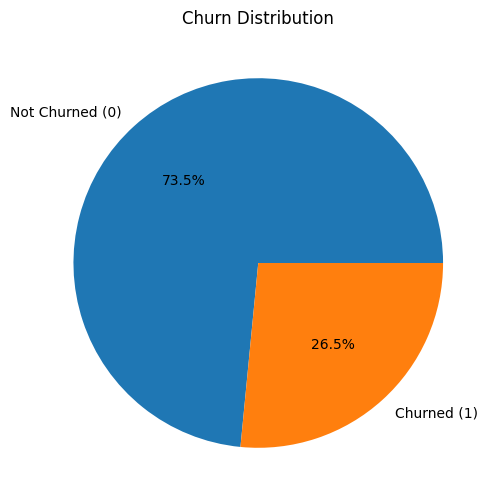

In [30]:
# Count occurrences of each unique value (0 and 1)
churn_counts = dfc['Churn'].value_counts()

# Labels and values
labels = churn_counts.index  # 0 and 1
sizes = churn_counts.values  # Count of each class

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=['Not Churned (0)', 'Churned (1)'], autopct='%1.1f%%')

# Title
plt.title("Churn Distribution")

# Show plot
plt.show()


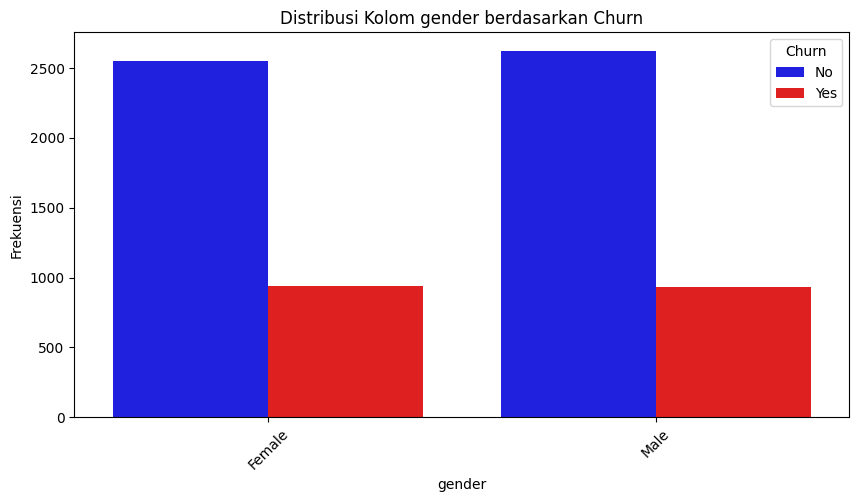

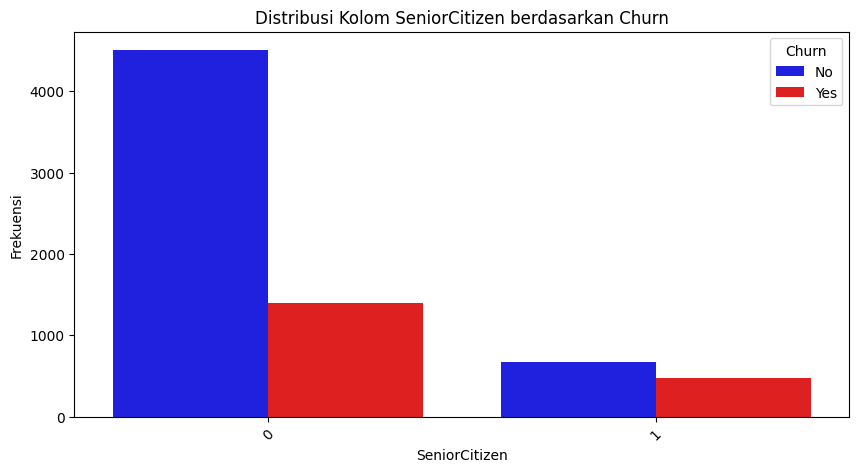

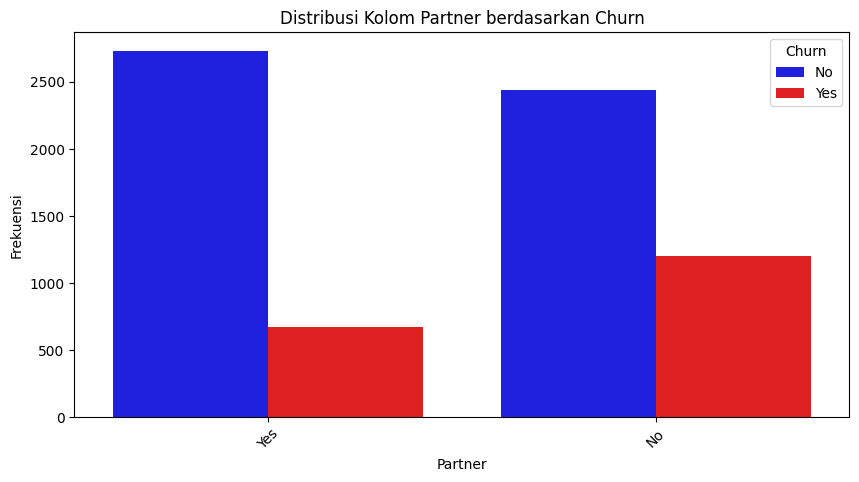

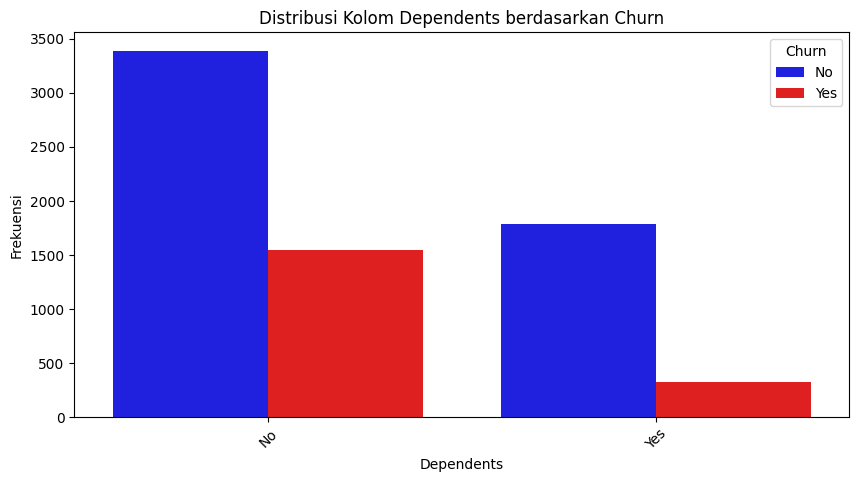

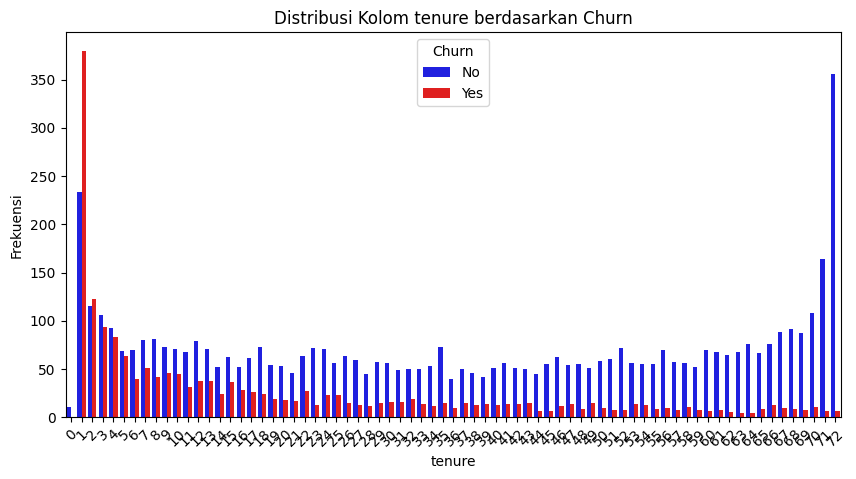

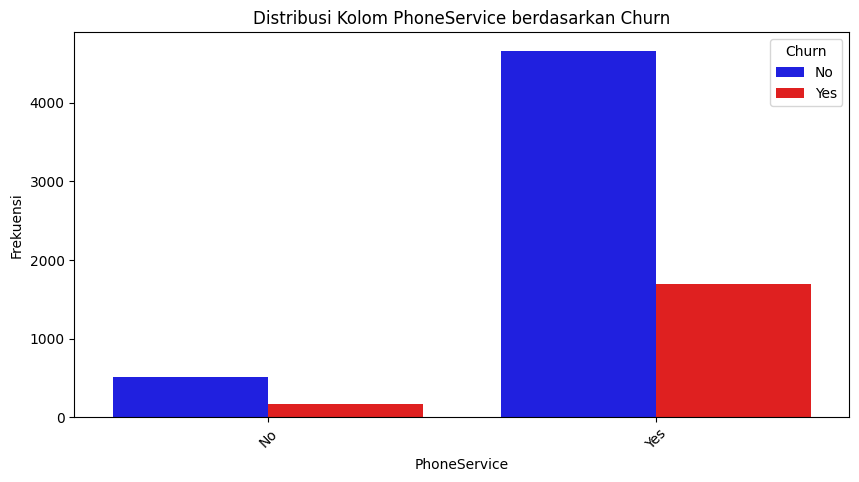

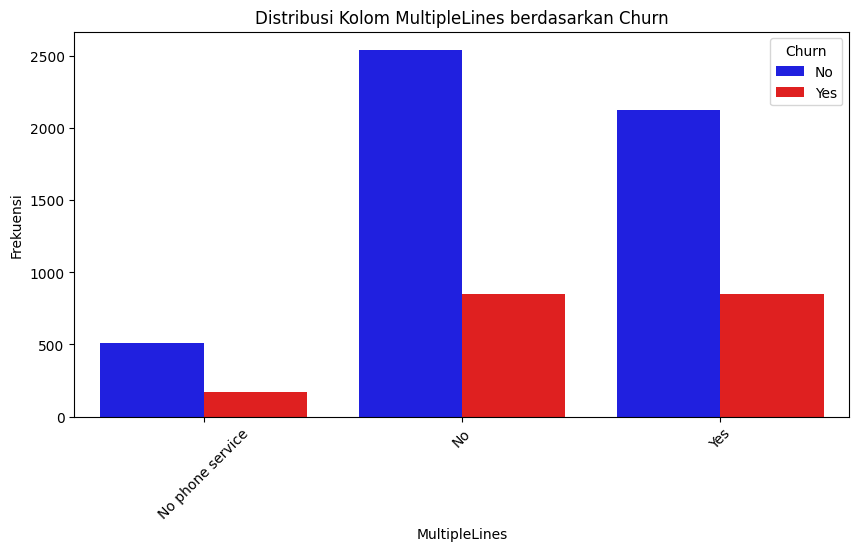

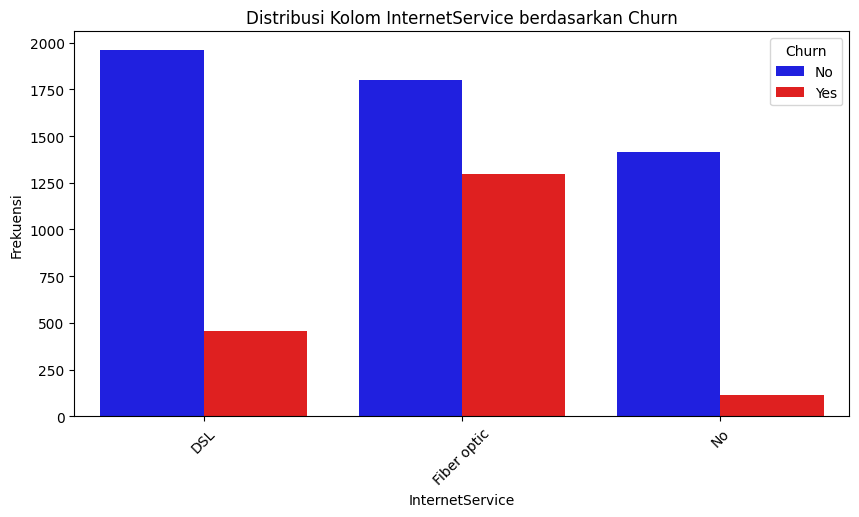

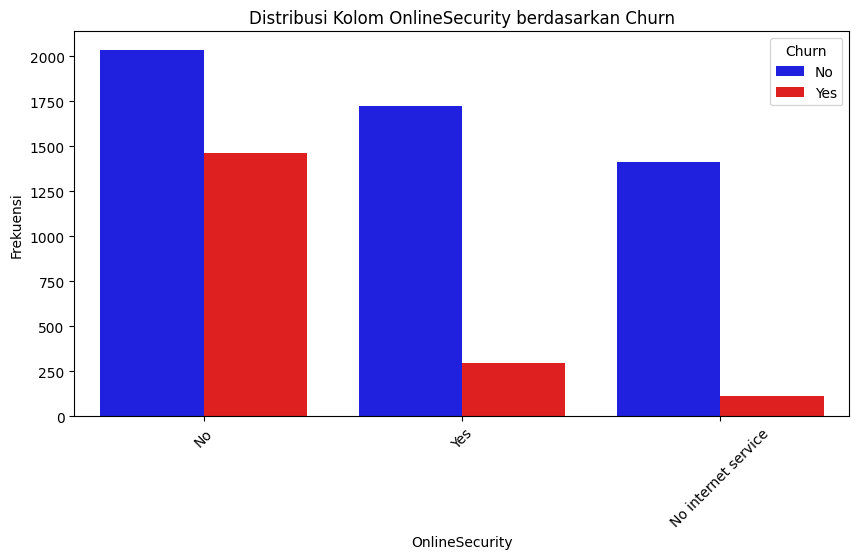

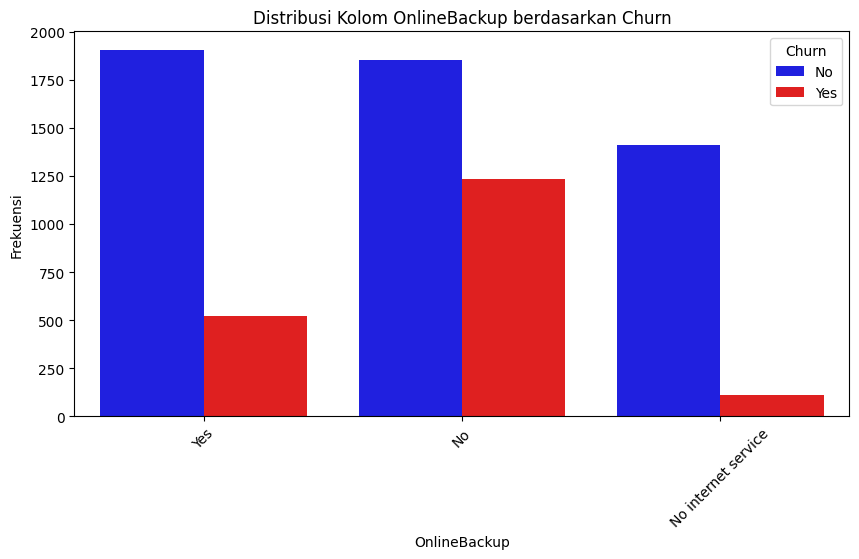

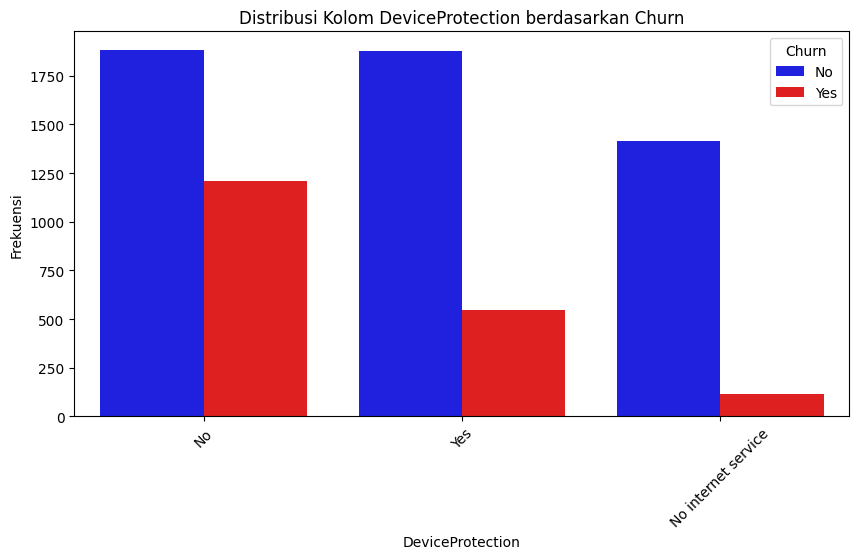

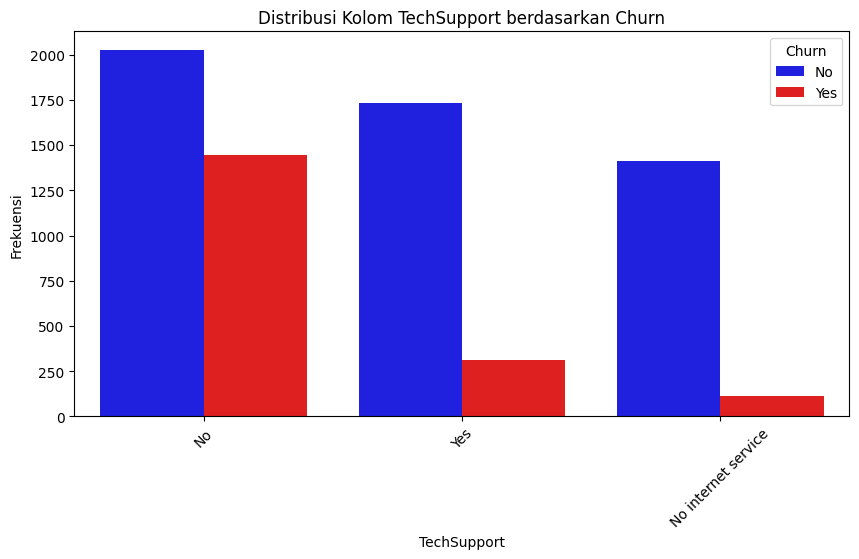

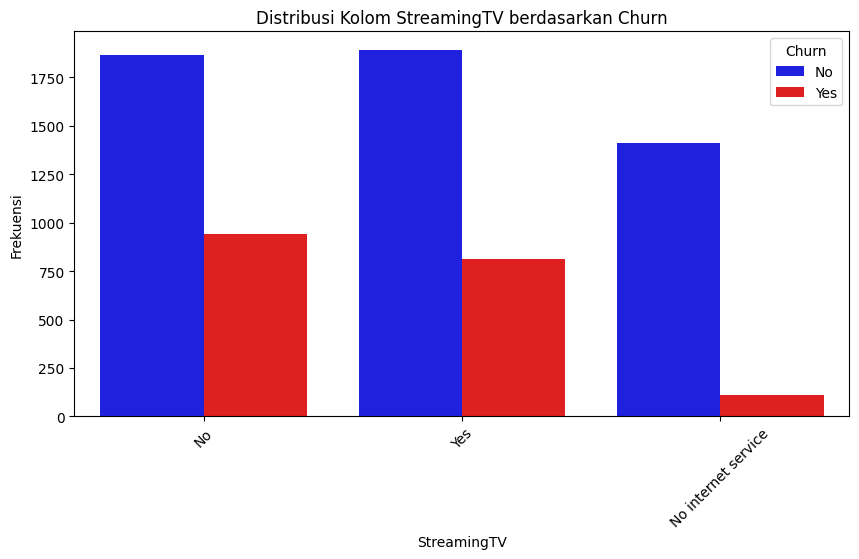

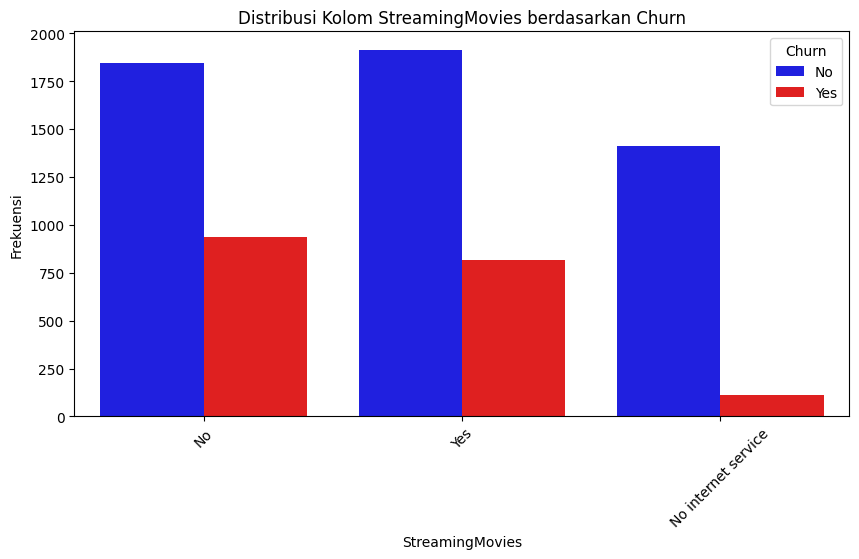

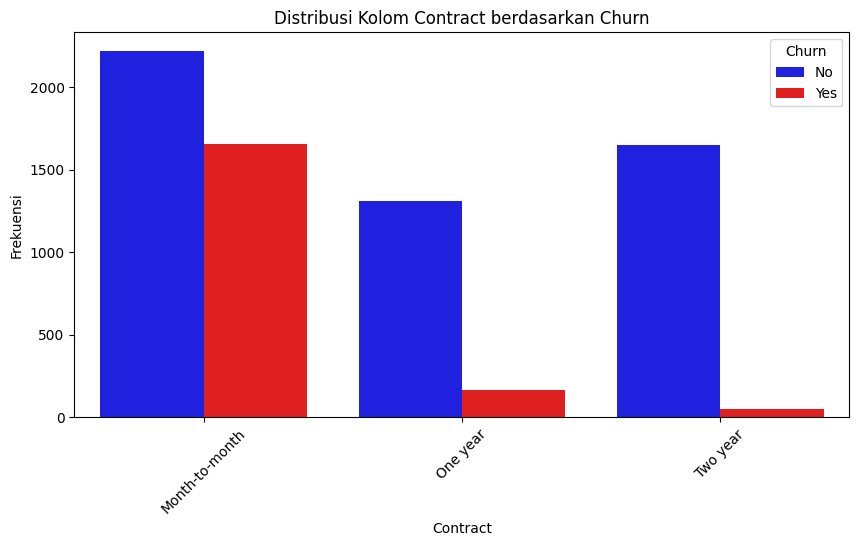

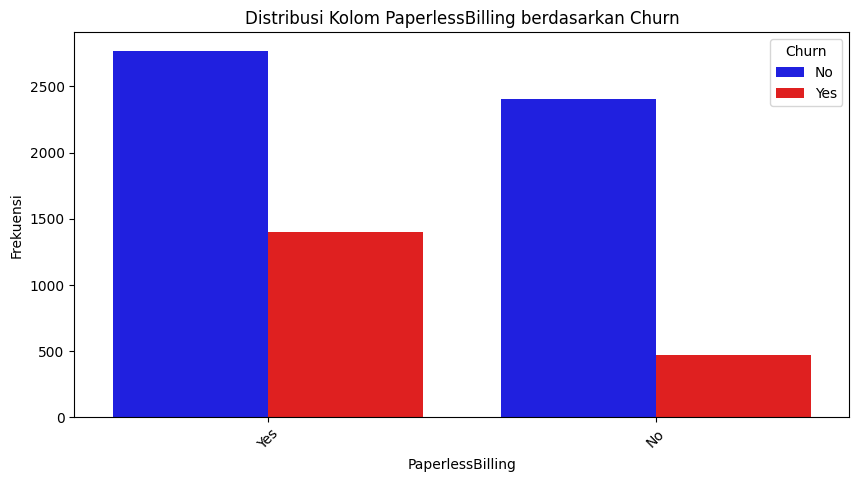

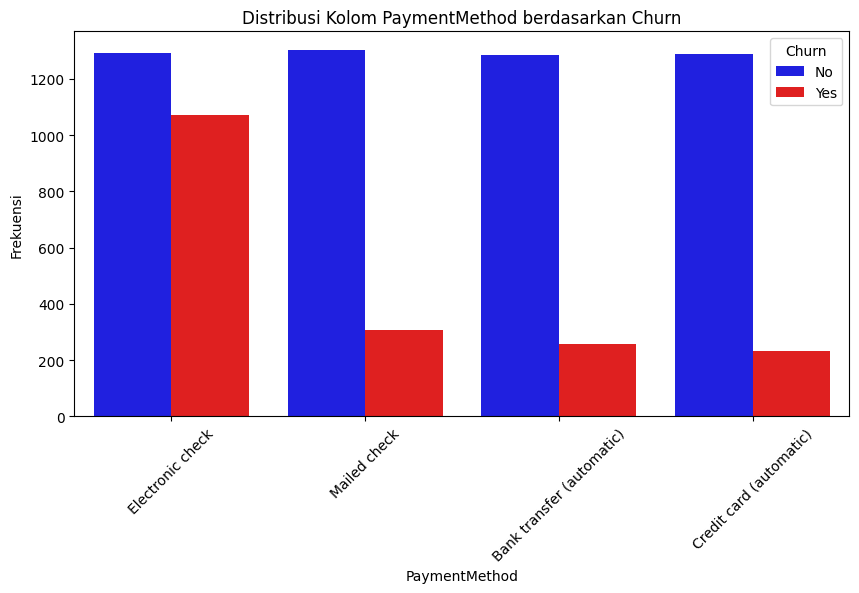

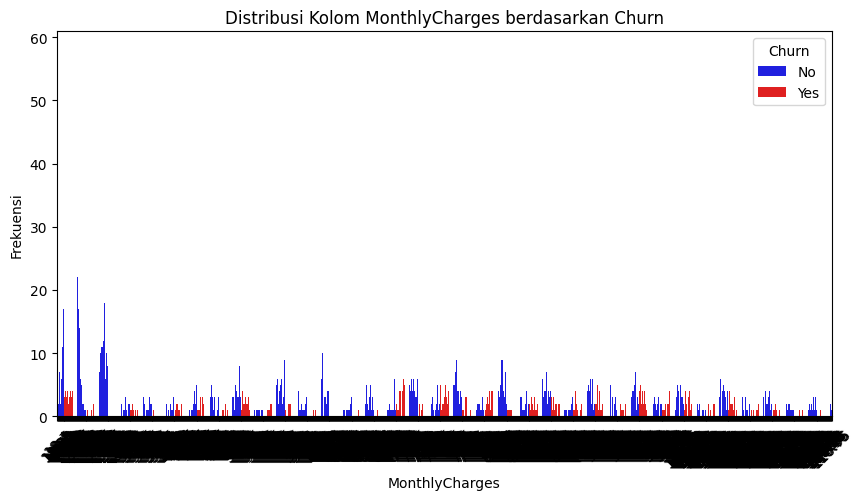

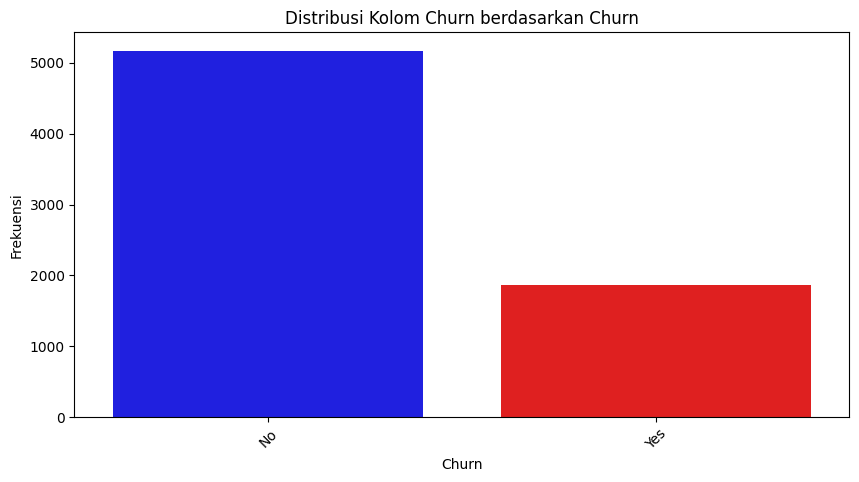

In [31]:
for col in dfc.columns:
    if col != 'TotalCharges':
        plt.figure(figsize=(10, 5))
        sns.countplot(data=dfc, x=col, hue='Churn', palette=['blue','red'])
        plt.title(f'Distribusi Kolom {col} berdasarkan Churn')
        plt.ylabel('Frekuensi')
        plt.xticks(rotation=45)
        plt.show()